### Reference: https://stackabuse.com/k-nearest-neighbors-algorithm-in-python-and-scikit-learn/

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_wine
# Import train and test split
from sklearn.model_selection import train_test_split

# Improt preprocessing module
from sklearn import preprocessing

# Import Random Forest
from sklearn.ensemble import RandomForestRegressor

# Import cross-validation tools
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

# Import metrics for model performance
from sklearn.metrics import mean_squared_error, r2_score

# Import module for storing arrays
import joblib

from sklearn.neighbors import KNeighborsClassifier

***

## Step 3: Load Dataset from file in Repository

<br>

In [2]:
data_1 = pd.read_csv('winequality-red.csv')

In [3]:
#print(data_1.head())

***

### Remove Semicolons from the data

<br>

In [4]:
data_2 = pd.read_csv('winequality-red.csv', sep=';')

#print(data_2.head)

***

### Check out the shape and summary statistics of the data

<br>

In [5]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
print(data_2.shape)

(1599, 12)


***

## Create groups of 'quantity' values as either 'bad' or good'

In [7]:
data_4 = data_2

In [8]:
#bins will set the limits for the classification.
bins = (3, 6, 8) #qualities ranging from 3–6 are classified as bad and 6–8 as good
group_names = [0, 1]
data_4['quality'] = pd.cut(data_4['quality'], bins = bins, labels = group_names)
data_4['quality'].head()

0    0
1    0
2    0
3    0
4    0
Name: quality, dtype: category
Categories (2, int64): [0 < 1]

In [9]:
pd.set_option('display.max_rows', 5000)

In [10]:
data_4['quality'] = pd.get_dummies(data_4['quality'],drop_first=True)
data_4['quality'][:5]

0    0
1    0
2    0
3    0
4    0
Name: quality, dtype: uint8

In [11]:
data_4['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

***

## Step 4: Split data into training and test sets

<br>

In [12]:
y = data_4.quality
X = data_4.drop('quality', axis=1)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=123, 
                                                    stratify=y)

***

## Fit the transformer on the training set 

<br>

#### Fitting the Transformer API

In [14]:
scaler = preprocessing.StandardScaler().fit(X_train)

***

## Step 5: Declare data preprocessing steps

<br>

#### Applying transformer to training data

In [15]:
X_train_scaled = scaler.transform(X_train)
 
print(X_train_scaled.mean(axis=0))

[ 6.03461334e-16  7.22209192e-17  4.02770511e-17  8.33318298e-17
  7.49986469e-17  4.99990979e-17  1.45830702e-17  3.65035081e-14
 -3.90131850e-15 -5.81933945e-16 -4.55547336e-16]


In [16]:
print(X_train_scaled.std(axis=0))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


#### Applying transformer to test data

In [17]:
X_test_scaled = scaler.transform(X_test)
 
print(X_test_scaled.mean(axis=0))

[ 0.06403778 -0.02673527  0.02412188 -0.0030829  -0.08793862  0.12069338
  0.07658711  0.06723619 -0.06274397 -0.04796901 -0.0242342 ]


In [18]:
print(X_test_scaled.std(axis=0))

[1.00072563 0.96844741 0.97707854 0.9749907  0.84353034 1.13110745
 1.03120342 0.97616286 0.90026362 0.9082083  0.96445576]


In [19]:
classifier = KNeighborsClassifier(n_neighbors=1)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [20]:
y_pred = classifier.predict(X_test)

In [21]:
from sklearn.metrics import accuracy_score

In [22]:
acc = accuracy_score(y_test, y_pred)
print(acc)

0.875


In [23]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.92      0.93       277
           1       0.53      0.58      0.56        43

    accuracy                           0.88       320
   macro avg       0.73      0.75      0.74       320
weighted avg       0.88      0.88      0.88       320

[[255  22]
 [ 18  25]]


In [24]:
accuracy = []

# Calculating error rate for measures of K between 1 and 50
for i in range(1, 50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    accuracy.append(np.mean(pred_i != y_test))

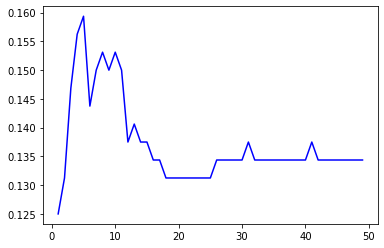

In [25]:
sns.lineplot(range(1,50), accuracy, color='blue')

In [33]:
from sklearn import KNeighborsRegressor

ImportError: cannot import name 'KNeighborsRegressor' from 'sklearn' (c:\users\hp\anaconda3\lib\site-packages\sklearn\__init__.py)

In [34]:
from sklearn.neighbors import KNeighborsRegressor

In [40]:
# Running KNN for various values of n_neighbors and storing results
knn_r_acc = []
for i in range(1,17,1):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train,y_train)
    test_score = knn.score(X_test,y_test)
    train_score = knn.score(X_train,y_train)
    knn_r_acc.append((i, test_score ,train_score))
df = pd.DataFrame(knn_r_acc, columns=['K','Test Score','Train Score'])

In [41]:
df

,K,Test Score,Train Score
0,1,-0.074637,1.000000
1,2,-0.067920,0.723938
2,3,0.017901,0.566874
3,4,0.016036,0.489451
4,5,0.063991,0.434305
5,6,0.072379,0.396506
6,7,0.036117,0.360312
7,8,0.044581,0.348094
8,9,0.054386,0.324606
9,10,0.048946,0.302926


***

## Scatterplots of variables showing positive correlation

#### Fixed Acidity Vs. Citric Acid: 0.7 Correlation

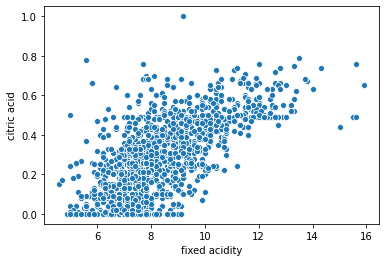

In [26]:
sns.scatterplot(x='fixed acidity', y='citric acid', data=data_4)

#### Fixed Acidity Vs. Density: 0.7 Correlation

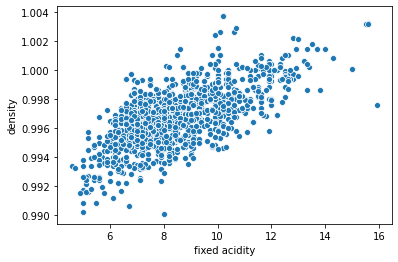

In [27]:
sns.scatterplot(x='fixed acidity', y='density', data=data_4)

#### Total Sulfur Dioxide Vs. Free Sulfur Dioxide: 0.7 Correlation

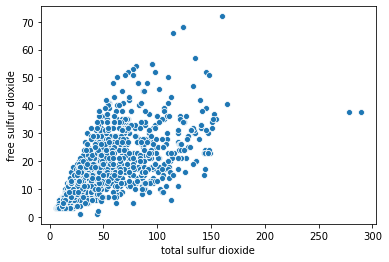

In [28]:
sns.scatterplot(x='total sulfur dioxide', y='free sulfur dioxide', data=data_4)

***

## Scatterplot of Variables Showing Negative Correlation

#### pH Vs. Fixed Acidity: -0.7 Correlation

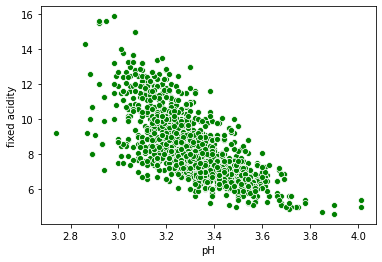

In [29]:
sns.scatterplot(x='pH', y='fixed acidity', data=data_4, color='green')

#### Citric Acid Vs. Volatile Acidity: -0.6 Correlation

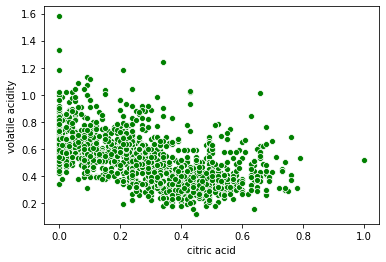

In [30]:
sns.scatterplot(x='citric acid', y='volatile acidity', data=data_4, color='green')

#### Alcohol Vs. Density: -0.7 Correlation

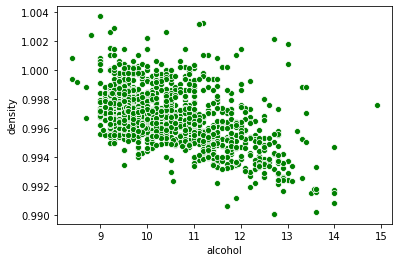

In [31]:
sns.scatterplot(x='alcohol', y='density', data=data_4, color='green')